Task 1 : Binary Representations.

This notebook implements various binary manipulation functions for 32-bit unsigned integers:
1. `rotl`: Rotate bits left
2. `rotr`: Rotate bits right
3. `ch`: Choose bits based on selector
4. `maj`: Majority vote of bits

## Function Implementations

Research :

Task 1 : https://galois.azc.uam.mx/mate/propaganda/Menezes.pdf The Handbook of Applied Cryptography was used throughout the tasks but for task 1 the research focus was on Bit Rotation, Ch (choose) and Maj (Majority) functions.

Task 2 : https://seriouscomputerist.atariverse.com/media/pdf/book/Art%20of%20Computer%20Programming%20-%20Volume%203%20(Sorting%20&%20Searching).pdf The Art of Computer Programming was skimmed through when completing task 2 s its the definitive resource on hashing algorithms.

Task 3 : https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf The FEDERAL INFORMATION PROCESSING STANDARDS PUBLICATION Secure Hash Standard (SHS) paper is the official standard that defines SHA-256.

Task 4 : https://link.springer.com/book/10.1007/0-387-28979-8 This book specifally focusus on computational approaches to prime numbers, covering both the sieve of Eratosthenes and trial division methods.

Task 5 : https://faculty.kfupm.edu.sa/phys/aanaqvi/Numerical%20Recipes-The%20Art%20of%20Scientific%20Computing%203rd%20Edition%20(Press%20et%20al).pdf Numerical Recipes covered the precise binary representation of irrational numbers like square roots.

Task 6 : https://unglueit-files.s3.amazonaws.com/ebf/05db7df4f31840f0a873d6ea14dcc28d.pdf The Bitcoin whitepaper and Antonopoulos' book explain the proof-of-work concept that directly relates to finding hashes with leading zeros.

Task 7 : https://cs.brown.edu/courses/csci1810/fall-2023/resources/ch2_readings/Sipser_Introduction.to.the.Theory.of.Computation.3E.pdf Sipser's book and Turing's paper cover the theoretical foundations of the Turing machine model implemented in the task.

Task 8 : https://enos.itcollege.ee/~japoia/algorithms/GT/Introduction_to_algorithms-3rd%20Edition.pdf The CLRS and Sedgewick algorithms books contain detailed analysis of bubble sort's complexity, matching the empirical analysis performed.

In [1]:
def rotl(x: int, n: int = 1) -> int:
    """
    Rotate a 32-bit unsigned integer to the left by n positions.
    
    Args:
        x: The integer to rotate (must be a 32-bit unsigned integer)
        n: Number of positions to rotate left (default: 1)
    
    Returns:
        The rotated integer
    """
    x = x & 0xFFFFFFFF  # Ensure 32-bit
    n = n % 32  # Normalize rotation amount
    return ((x << n) | (x >> (32 - n))) & 0xFFFFFFFF

In [2]:
# Test rotl function
print("Testing rotl function:")
test_num = 0x12345678
print(f"Original number: {hex(test_num)}")
print(f"Rotated left 4 bits: {hex(rotl(test_num, 4))}")
print(f"Rotated left 8 bits: {hex(rotl(test_num, 8))}")
print(f"Rotated left 16 bits: {hex(rotl(test_num, 16))}")

Testing rotl function:
Original number: 0x12345678
Rotated left 4 bits: 0x23456781
Rotated left 8 bits: 0x34567812
Rotated left 16 bits: 0x56781234


In [3]:
def rotr(x: int, n: int = 1) -> int:
    """
    Rotate a 32-bit unsigned integer to the right by n positions.
    
    Args:
        x: The integer to rotate (must be a 32-bit unsigned integer)
        n: Number of positions to rotate right (default: 1)
    
    Returns:
        The rotated integer
    """
    x = x & 0xFFFFFFFF  # Ensure 32-bit
    n = n % 32  # Normalize rotation amount
    return ((x >> n) | (x << (32 - n))) & 0xFFFFFFFF

In [4]:
# Test rotr function
print("Testing rotr function:")
test_num = 0x12345678
print(f"Original number: {hex(test_num)}")
print(f"Rotated right 4 bits: {hex(rotr(test_num, 4))}")
print(f"Rotated right 8 bits: {hex(rotr(test_num, 8))}")
print(f"Rotated right 16 bits: {hex(rotr(test_num, 16))}")

Testing rotr function:
Original number: 0x12345678
Rotated right 4 bits: 0x81234567
Rotated right 8 bits: 0x78123456
Rotated right 16 bits: 0x56781234


In [5]:
def ch(x: int, y: int, z: int) -> int:
    """
    Choose bits from y where x has 1s, and from z where x has 0s.
    
    Args:
        x: The selector integer
        y: First input integer
        z: Second input integer
    
    Returns:
        The resulting integer after bit selection
    """
    return (x & y) ^ (~x & z)

In [6]:
# Test ch function
print("Testing ch function:")
x = 0xFFFFFFFF
y = 0xAAAAAAAA  # Pattern of alternating 1s and 0s
z = 0x55555555  # Inverse pattern of y

print(f"x: {hex(x)}")
print(f"y: {hex(y)}")
print(f"z: {hex(z)}")
print(f"ch(x,y,z): {hex(ch(x,y,z))}")

# Test with x = 0
x = 0x00000000
print(f"\nx: {hex(x)}")
print(f"y: {hex(y)}")
print(f"z: {hex(z)}")
print(f"ch(x,y,z): {hex(ch(x,y,z))}")

Testing ch function:
x: 0xffffffff
y: 0xaaaaaaaa
z: 0x55555555
ch(x,y,z): 0xaaaaaaaa

x: 0x0
y: 0xaaaaaaaa
z: 0x55555555
ch(x,y,z): 0x55555555


In [7]:
def maj(x: int, y: int, z: int) -> int:
    """
    Take majority vote of bits in x, y, and z.
    
    Args:
        x: First input integer
        y: Second input integer
        z: Third input integer
    
    Returns:
        Integer with 1s where majority (2 or more) inputs have 1s
    """
    return (x & y) ^ (x & z) ^ (y & z)

In [8]:
# Test maj function
print("Testing maj function:")
x = 0xFFFFFFFF
y = 0xAAAAAAAA
z = 0x55555555

print(f"x: {hex(x)}")
print(f"y: {hex(y)}")
print(f"z: {hex(z)}")
print(f"maj(x,y,z): {hex(maj(x,y,z))}")

# Test with different patterns
x = 0x00000000
print(f"\nx: {hex(x)}")
print(f"y: {hex(y)}")
print(f"z: {hex(z)}")
print(f"maj(x,y,z): {hex(maj(x,y,z))}")

Testing maj function:
x: 0xffffffff
y: 0xaaaaaaaa
z: 0x55555555
maj(x,y,z): 0xffffffff

x: 0x0
y: 0xaaaaaaaa
z: 0x55555555
maj(x,y,z): 0x0


Task 2

In [9]:
def hash_function(s):
    """
    Python implementation of the hash function from 
    The C Programming Language by Brian Kernighan and Dennis Ritchie.
    
    Args:
        s (str): The string to hash
        
    Returns:
        int: The hash value
    """
    hashval = 0
    for char in s:
        hashval = ord(char) + 31 * hashval
    return hashval % 101

In [10]:
# Test with some sample strings
test_strings = [
    "hello",
    "world",
    "python",
    "hash",
    "function",
    "algorithm",
    "kernighan",
    "ritchie",
    "programming",
    "language"
]

print("String\t\tHash Value")
print("-" * 30)
for s in test_strings:
    print(f"{s:<15}\t{hash_function(s)}")

String		Hash Value
------------------------------
hello          	17
world          	34
python         	91
hash           	15
function       	100
algorithm      	76
kernighan      	37
ritchie        	26
programming    	89
language       	68


In [11]:
# Test for collisions
all_values = {}
for i in range(1000):
    test_str = f"test{i}"
    hash_val = hash_function(test_str)
    if hash_val in all_values:
        all_values[hash_val].append(test_str)
    else:
        all_values[hash_val] = [test_str]

# Count collisions
collisions = sum(len(strings) - 1 for strings in all_values.values() if len(strings) > 1)
print(f"\nCollision test with 1000 strings:")
print(f"Number of unique hash values: {len(all_values)}")
print(f"Number of collisions: {collisions}")
print(f"Collision rate: {collisions/1000:.2%}")


Collision test with 1000 strings:
Number of unique hash values: 101
Number of collisions: 899
Collision rate: 89.90%


Task 3: SHA256

In [12]:
def calculate_sha256_padding(file_path: str) -> None:
    """
    Calculate and print the SHA256 padding that would be applied to a file.
    
    The SHA256 padding consists of:
    1. A '1' bit (0x80 byte)
    2. Enough '0' bits to make the total length a multiple of 512 bits
    3. The original message length as a 64-bit big-endian integer
    
    Args:
        file_path: Path to the file to calculate padding for
    """
    # Get the file size in bytes
    file_size = 0
    with open(file_path, 'rb') as f:
        # Read the file in chunks to handle large files
        chunk = f.read(8192)
        while chunk:
            file_size += len(chunk)
            chunk = f.read(8192)
    
    # Calculate the file size in bits
    file_size_bits = file_size * 8
    
    # Calculate padding
    # First byte of padding is always 0x80 (a '1' bit followed by 7 '0' bits)
    padding = [0x80]
    
    # Calculate how many bytes of zeros we need
    # The total length needs to be a multiple of 512 bits (64 bytes)
    # We need to reserve 8 bytes (64 bits) for the length field
    # So we need to pad to: (n*64 - 8 - 1) bytes, where n is some integer
    # and 1 is for the 0x80 byte we already added
    
    # Calculate how many bytes we need to add to get to a multiple of 64 bytes
    # minus 9 bytes (1 for 0x80 and 8 for the length)
    remainder = (file_size + 1) % 64
    zero_bytes_needed = 64 - 8 - remainder if remainder <= 56 else 128 - 8 - remainder
    
    # Add the zero bytes
    padding.extend([0x00] * zero_bytes_needed)
    
    # Add the original length as a 64-bit big-endian integer
    # We need to represent the length in bits, not bytes
    for i in range(7, -1, -1):
        # Extract each byte of the 64-bit length
        padding.append((file_size_bits >> (i * 8)) & 0xFF)
    
    # Print the padding in hex format
    padding_hex = ' '.join(f'{byte:02X}' for byte in padding)
    
    # Format the output to match the example (with line breaks every 26 bytes)
    formatted_output = ''
    for i in range(0, len(padding_hex), 78):  # 26 bytes = 26*3 chars (including spaces)
        formatted_output += padding_hex[i:i+78] + '\n'
    
    print(f"SHA256 padding for file '{file_path}':")
    print(formatted_output.strip())

In [13]:
# Test the SHA256 padding function with a simple example
import os

# Create a test file with content "abc"
test_file = "test_abc.txt"
with open(test_file, "wb") as f:
    f.write(b"abc")

# Calculate and print the padding
calculate_sha256_padding(test_file)

# Clean up the test file
os.remove(test_file)

SHA256 padding for file 'test_abc.txt':
80 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 18


Task 4: Prime Numbers

This task implements two different algorithms to find prime numbers:
1. Sieve of Eratosthenes - An efficient algorithm that marks non-prime numbers in a range
2. Trial Division - A simple algorithm that checks each number for divisibility

In [14]:
def sieve_of_eratosthenes(n: int) -> list[int]:
    """
    Find all prime numbers up to n using the Sieve of Eratosthenes algorithm.
    
    The algorithm works by:
    1. Creating a boolean array of size n+1, initially all True
    2. Starting from 2, for each prime number:
       - Mark all its multiples as non-prime
    3. Collect all numbers that remain marked as True
    
    Args:
        n: Upper limit to find primes up to
    
    Returns:
        List of prime numbers up to n
    """
    # Create a boolean array "is_prime[0..n]" and initialize
    # all entries it as true. A value in is_prime[i] will
    # finally be false if i is Not a prime, else true.
    is_prime = [True] * (n + 1)
    is_prime[0] = is_prime[1] = False
    
    for i in range(2, int(n ** 0.5) + 1):
        if is_prime[i]:
            # Update all multiples of i
            for j in range(i * i, n + 1, i):
                is_prime[j] = False
    
    # Collect all prime numbers
    return [i for i in range(n + 1) if is_prime[i]]

In [15]:
def trial_division(n: int) -> bool:
    """
    Check if a number is prime using trial division.
    
    The algorithm works by:
    1. Checking if the number is divisible by any integer from 2 to sqrt(n)
    2. If no divisors are found, the number is prime
    
    Args:
        n: Number to check for primality
    
    Returns:
        True if n is prime, False otherwise
    """
    if n < 2:
        return False
    for i in range(2, int(n ** 0.5) + 1):
        if n % i == 0:
            return False
    return True

def find_primes_trial_division(count: int) -> list[int]:
    """
    Find the first 'count' prime numbers using trial division.
    
    Args:
        count: Number of prime numbers to find
    
    Returns:
        List of the first 'count' prime numbers
    """
    primes = []
    num = 2
    
    while len(primes) < count:
        if trial_division(num):
            primes.append(num)
        num += 1
    
    return primes

In [16]:
# Find first 100 primes using both methods
import time

# Using Sieve of Eratosthenes
print("Finding first 100 primes using Sieve of Eratosthenes:")
start_time = time.time()
# We need to estimate an upper bound for the 100th prime
# The nth prime is approximately n * log(n)
n = 100
upper_bound = int(n * (n ** 0.5))  # Conservative estimate
sieve_primes = sieve_of_eratosthenes(upper_bound)[:n]
sieve_time = time.time() - start_time

# Using Trial Division
print("\nFinding first 100 primes using Trial Division:")
start_time = time.time()
trial_primes = find_primes_trial_division(n)
trial_time = time.time() - start_time

# Compare results and performance
print(f"\nFirst 100 primes (both methods):")
print(sieve_primes)
print(f"\nTime taken by Sieve of Eratosthenes: {sieve_time:.6f} seconds")
print(f"Time taken by Trial Division: {trial_time:.6f} seconds")
print(f"\nMethods agree: {sieve_primes == trial_primes}")

Finding first 100 primes using Sieve of Eratosthenes:

Finding first 100 primes using Trial Division:

First 100 primes (both methods):
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541]

Time taken by Sieve of Eratosthenes: 0.000082 seconds
Time taken by Trial Division: 0.000129 seconds

Methods agree: True


# Task 5: Square Root Fractional Bits

This task calculates the first 32 bits of the fractional parts of square roots of the first 100 prime numbers.

For example, for √2:
- √2 ≈ 1.4142135623730950488016887242097...
- Fractional part: 0.4142135623730950488016887242097...
- First 32 bits of this fractional part in binary

Key steps:
1. Get first 100 prime numbers (reusing code from Task 4)
2. Calculate square roots
3. Extract fractional parts
4. Convert to binary representation
5. Get first 32 bits

In [17]:
import math
import decimal
from decimal import Decimal

def get_fractional_sqrt_bits(n: int, num_bits: int = 32) -> str:
    """
    Calculate the first num_bits bits of the fractional part of sqrt(n).
    
    Args:
        n: Number to calculate square root of
        num_bits: Number of bits to calculate (default: 32)
    
    Returns:
        String of binary digits representing the fractional part
    """
    # Set precision high enough to get accurate binary representation
    decimal.getcontext().prec = 40
    
    # Calculate square root and get fractional part
    sqrt = Decimal(n).sqrt()
    fractional = sqrt % 1
    
    # Convert to binary
    binary = ''
    for _ in range(num_bits):
        # Multiply by 2 and check if ≥ 1
        fractional *= 2
        if fractional >= 1:
            binary += '1'
            fractional -= 1
        else:
            binary += '0'
    
    return binary

def calculate_prime_sqrt_bits(num_primes: int = 100, num_bits: int = 32) -> list[tuple[int, str]]:
    """
    Calculate binary fractional parts of square roots of first num_primes prime numbers.
    
    Args:
        num_primes: Number of primes to process
        num_bits: Number of bits to calculate for each square root
    
    Returns:
        List of tuples (prime, binary_fractional_part)
    """
    # Reuse the sieve function from Task 4 to get primes
    n = int(num_primes * (num_primes ** 0.5))  # Conservative upper bound
    primes = sieve_of_eratosthenes(n)[:num_primes]
    
    # Calculate binary fractional parts for each prime
    results = []
    for prime in primes:
        binary = get_fractional_sqrt_bits(prime, num_bits)
        results.append((prime, binary))
    
    return results

In [18]:
# Calculate and display results
results = calculate_prime_sqrt_bits(100, 32)

print("First 32 bits of fractional parts of square roots of first 100 primes:")
print("\nPrime | Binary representation of fractional part")
print("-" * 50)

for prime, binary in results:
    # Format output to align numbers and show bit grouping
    binary_grouped = ' '.join(binary[i:i+8] for i in range(0, 32, 8))
    print(f"{prime:4d} | {binary_grouped}")

# Also show some statistics
print("\nStatistics:")
print(f"Total numbers processed: {len(results)}")
print(f"Number of bits per number: 32")

# Count some interesting patterns
ones_count = sum(binary.count('1') for _, binary in results)
zeros_count = sum(binary.count('0') for _, binary in results)
print(f"\nTotal 1s: {ones_count}")
print(f"Total 0s: {zeros_count}")
print(f"Average 1s per number: {ones_count/len(results):.2f}")

First 32 bits of fractional parts of square roots of first 100 primes:

Prime | Binary representation of fractional part
--------------------------------------------------
   2 | 01101010 00001001 11100110 01100111
   3 | 10111011 01100111 10101110 10000101
   5 | 00111100 01101110 11110011 01110010
   7 | 10100101 01001111 11110101 00111010
  11 | 01010001 00001110 01010010 01111111
  13 | 10011011 00000101 01101000 10001100
  17 | 00011111 10000011 11011001 10101011
  19 | 01011011 11100000 11001101 00011001
  23 | 11001011 10111011 10011101 01011101
  29 | 01100010 10011010 00101001 00101010
  31 | 10010001 01011001 00000001 01011010
  37 | 00010101 00101111 11101100 11011000
  41 | 01100111 00110011 00100110 01100111
  43 | 10001110 10110100 01001010 10000111
  47 | 11011011 00001100 00101110 00001101
  53 | 01000111 10110101 01001000 00011101
  59 | 10101110 01011111 10010001 01010110
  61 | 11001111 01101100 10000101 11010011
  67 | 00101111 01110011 01000111 01111101
  71 | 0110

# Task 6: Proof of Work

This task finds English words that have the most leading zero bits in their SHA256 hash digest, similar to the concept of mining difficulty in cryptocurrencies.

Key steps:
1. Load a comprehensive English dictionary
2. Calculate SHA256 hash for each word
3. Count leading zero bits in each hash
4. Find words with the highest number of leading zeros

This is essentially a simplified version of cryptocurrency mining's proof-of-work, where we're looking for natural English words that happen to have hash properties similar to what miners seek.

In [19]:
import hashlib
import urllib.request
import ssl
from typing import Tuple, List
import os

def download_word_list() -> List[str]:
    """
    Download a comprehensive English word list from the MIT wordlist.
    Returns a list of words, all lowercase.
    """
    # Create an SSL context that doesn't verify certificates
    context = ssl._create_unverified_context()
    
    # URL for MIT's word list
    url = "https://raw.githubusercontent.com/dwyl/english-words/master/words.txt"
    
    try:
        # Download the word list
        with urllib.request.urlopen(url, context=context) as response:
            words = response.read().decode('utf-8').splitlines()
        return [word.lower() for word in words if word.isalpha()]
    except Exception as e:
        print(f"Error downloading word list: {e}")
        # Fallback to a small set of common words if download fails
        return ["the", "be", "to", "of", "and", "a", "in", "that", "have", "i"]

In [20]:
def count_leading_zero_bits(hash_bytes: bytes) -> Tuple[int, str]:
    """
    Count the number of leading zero bits in a hash.
    Returns tuple of (count, binary_string).
    """
    # Convert hash to binary string
    binary = ''.join(format(b, '08b') for b in hash_bytes)
    
    # Count leading zeros
    leading_zeros = 0
    for bit in binary:
        if bit == '0':
            leading_zeros += 1
        else:
            break
            
    return leading_zeros, binary

def find_best_words(words: List[str], top_n: int = 10) -> List[Tuple[str, int, str]]:
    """
    Find the words with the most leading zero bits in their SHA256 hash.
    Returns list of tuples (word, zero_count, hash_hex).
    """
    results = []
    
    for word in words:
        # Calculate SHA256 hash
        hash_obj = hashlib.sha256(word.encode('utf-8'))
        hash_bytes = hash_obj.digest()
        hash_hex = hash_obj.hexdigest()
        
        # Count leading zeros
        zero_count, _ = count_leading_zero_bits(hash_bytes)
        
        results.append((word, zero_count, hash_hex))
    
    # Sort by number of leading zeros (descending)
    results.sort(key=lambda x: x[1], reverse=True)
    
    return results[:top_n]

In [21]:
# Download word list and find words with most leading zeros
print("Downloading word list...")
words = download_word_list()
print(f"Processing {len(words)} words...")

# Find top 10 words
top_words = find_best_words(words, top_n=10)

# Display results
print("\nTop 10 words with most leading zero bits in SHA256 hash:")
print("\nWord | Leading Zeros | Hash (hex)")
print("-" * 70)

for word, zeros, hash_hex in top_words:
    print(f"{word:<20} | {zeros:<13} | {hash_hex}")

# Verify words exist in dictionary
print("\nVerifying words in dictionary...")
for word, _, _ in top_words:
    # Check if word exists in downloaded list
    if word in words:
        print(f"✓ '{word}' is verified to exist in the English dictionary")

Processing 416296 words...

Top 10 words with most leading zero bits in SHA256 hash:

Word | Leading Zeros | Hash (hex)
----------------------------------------------------------------------
goaltenders          | 18            | 00002e68c9d3d1fc5d3178bee91040efbeb4ac9ea7722c834fa5d71b2e3845cd
evander              | 16            | 0000a7752539107d17f8a8204f46e52cc4b2c7cc60099027f9afb327fc2981bd
guilefulness         | 16            | 0000d79e1c6964e6806e9bbdaaaecb63dfabdb498f72bf28944119de1fe90d63
mismatchment         | 16            | 0000bb6ede9f29a01d35e15320229aa0fbd73cf8eb8bc0aac80d6a97fba63fee
duppa                | 15            | 0001d81b1189c6a30d049b421a40a717372e83f5450b6106d66fef29280f2849
grady                | 15            | 00015674232002d9293d38e1da786f88f5eb55cdaca0a9186a8de3817663ab6c
mountable            | 15            | 00019347bddcfe0cd6b54f6751d9928518ad1acff8c8489f14fb834da3795f64
palala               | 15            | 0001c4dbc2962bc9b13cc5842bf0989613332100f1

## Analysis of Results

The words shown above represent natural English words that happen to have SHA256 hashes with the most leading zero bits. This is analogous to cryptocurrency mining, where miners try to find nonces that produce hashes with a certain number of leading zeros.

A few interesting observations:
1. These words achieve their leading zeros naturally, without any modification
2. The probability of finding a hash with n leading zero bits is 1/2^n
3. This demonstrates why proof-of-work is effective - finding hashes with many leading zeros requires significant computational work

Note: The actual results may vary slightly each time the code is run due to the random nature of hash functions and potential variations in the word list source.

# Task 7: Turing Machine Binary Incrementer

This task implements a Turing Machine that adds 1 to a binary number. The machine:
- Starts at the leftmost digit of the input
- Treats rightmost digit as least significant bit
- Follows standard binary addition rules with carry

## State Transition Rules:
1. Move right until reaching the rightmost digit
2. Add 1 to the rightmost digit:
   - If 0, change to 1 and halt
   - If 1, change to 0 and carry 1 left
3. For carry operations:
   - If next digit is 0, change to 1 and halt
   - If next digit is 1, change to 0 and continue carrying left
4. If carrying reaches beyond leftmost digit, add new 1 digit

Example:
Input:  100111
Output: 101000

In [22]:
from enum import Enum
from typing import List, Tuple, Optional
from dataclasses import dataclass

class State(Enum):
    """States for the binary incrementer Turing Machine"""
    INIT = "INIT"           # Initial state, moving right
    CARRY = "CARRY"         # Carrying 1 to the left
    HALT = "HALT"          # Machine has completed

class Direction(Enum):
    """Movement directions on the tape"""
    LEFT = "L"
    RIGHT = "R"
    STAY = "S"

@dataclass
class Transition:
    """Represents a single transition in the Turing Machine"""
    next_state: State
    write_symbol: str
    direction: Direction

class TuringMachine:
    def __init__(self):
        """Initialize the Turing Machine with transition rules"""
        self.tape: List[str] = []
        self.head_pos: int = 0
        self.state: State = State.INIT
        
        # Define transition rules: (current_state, read_symbol) -> (next_state, write_symbol, direction)
        self.transitions = {
            (State.INIT, '0'): Transition(State.INIT, '0', Direction.RIGHT),
            (State.INIT, '1'): Transition(State.INIT, '1', Direction.RIGHT),
            (State.INIT, ' '): Transition(State.CARRY, ' ', Direction.LEFT),
            (State.CARRY, '0'): Transition(State.HALT, '1', Direction.STAY),
            (State.CARRY, '1'): Transition(State.CARRY, '0', Direction.LEFT),
            (State.CARRY, ' '): Transition(State.HALT, '1', Direction.STAY),
        }
    
    def step(self) -> bool:
        """
        Perform one step of the Turing Machine.
        Returns: True if machine should continue, False if halted
        """
        if self.state == State.HALT:
            return False
            
        # Read current symbol (space if out of bounds)
        current_symbol = self.tape[self.head_pos] if 0 <= self.head_pos < len(self.tape) else ' '
        
        # Get transition rule
        transition = self.transitions.get((self.state, current_symbol))
        if not transition:
            self.state = State.HALT
            return False
            
        # Apply transition
        if 0 <= self.head_pos < len(self.tape):
            self.tape[self.head_pos] = transition.write_symbol
        elif transition.write_symbol != ' ':
            # Extend tape if writing beyond bounds
            if self.head_pos < 0:
                self.tape.insert(0, transition.write_symbol)
                self.head_pos = 0
            else:
                self.tape.append(transition.write_symbol)
        
        # Move head
        if transition.direction == Direction.LEFT:
            self.head_pos -= 1
        elif transition.direction == Direction.RIGHT:
            self.head_pos += 1
            
        # Update state
        self.state = transition.next_state
        return True
    
    def run(self, input_binary: str) -> str:
        """
        Run the Turing Machine on the input binary number until it halts.
        Returns: The resulting binary number
        """
        # Initialize tape with input
        self.tape = list(input_binary.strip())
        self.head_pos = 0
        self.state = State.INIT
        
        # Run until halted
        while self.step():
            pass
            
        return ''.join(self.tape)

In [23]:
def test_binary_incrementer():
    """Test the binary incrementer Turing Machine with various inputs"""
    test_cases = [
        ("100111", "101000"),
        ("1111", "10000"),
        ("0", "1"),
        ("1", "10"),
        ("11111111", "100000000")
    ]
    
    tm = TuringMachine()
    
    print("Testing Binary Incrementer Turing Machine")
    print("\nInput -> Output (Expected)")
    print("-" * 30)
    
    for input_num, expected in test_cases:
        result = tm.run(input_num)
        success = "✓" if result == expected else "✗"
        print(f"{input_num} -> {result} ({expected}) {success}")
        
        if result != expected:
            print(f"  Error: Expected {expected}, got {result}")

# Run the tests
test_binary_incrementer()

Testing Binary Incrementer Turing Machine

Input -> Output (Expected)
------------------------------
100111 -> 101000 (101000) ✓
1111 -> 10000 (10000) ✓
0 -> 1 (1) ✓
1 -> 10 (10) ✓
11111111 -> 100000000 (100000000) ✓


In [24]:
def visualize_increment_process(input_binary: str):
    """
    Visualize the Turing Machine's operation step by step
    """
    tm = TuringMachine()
    tm.tape = list(input_binary)
    tm.head_pos = 0
    tm.state = State.INIT
    
    step_count = 0
    print(f"Step {step_count}: Initial configuration")
    print(f"Tape: {''.join(tm.tape)}")
    print(f"Head: {' ' * tm.head_pos}↓")
    print(f"State: {tm.state.value}\n")
    
    while tm.step():
        step_count += 1
        print(f"Step {step_count}:")
        print(f"Tape: {''.join(tm.tape)}")
        print(f"Head: {' ' * tm.head_pos}↓")
        print(f"State: {tm.state.value}\n")
    
    print("Final configuration:")
    print(f"Tape: {''.join(tm.tape)}")
    print(f"State: {tm.state.value}")

# Demonstrate the visualization with an example
print("Visualizing increment process for '100111':\n")
visualize_increment_process("100111")

Visualizing increment process for '100111':

Step 0: Initial configuration
Tape: 100111
Head: ↓
State: INIT

Step 1:
Tape: 100111
Head:  ↓
State: INIT

Step 2:
Tape: 100111
Head:   ↓
State: INIT

Step 3:
Tape: 100111
Head:    ↓
State: INIT

Step 4:
Tape: 100111
Head:     ↓
State: INIT

Step 5:
Tape: 100111
Head:      ↓
State: INIT

Step 6:
Tape: 100111
Head:       ↓
State: INIT

Step 7:
Tape: 100111
Head:      ↓
State: CARRY

Step 8:
Tape: 100110
Head:     ↓
State: CARRY

Step 9:
Tape: 100100
Head:    ↓
State: CARRY

Step 10:
Tape: 100000
Head:   ↓
State: CARRY

Step 11:
Tape: 101000
Head:   ↓
State: HALT

Final configuration:
Tape: 101000
State: HALT


## Analysis of the Turing Machine

The implemented Turing Machine successfully increments binary numbers using the following strategy:

1. **Initial Phase**: 
   - Moves right until it reaches the end of the number
   - Prepares for the carry operation

2. **Carry Phase**:
   - Moves left, changing 1s to 0s until it finds a 0
   - Changes the first 0 it finds to 1 and halts
   - If it reaches the left end, adds a new 1 digit

3. **Special Cases**:
   - Handles numbers of any length
   - Correctly manages carry propagation
   - Automatically extends the tape when needed (e.g., 1111 -> 10000)

The machine is minimal in terms of states (INIT, CARRY, HALT) while still handling all cases correctly. The implementation demonstrates key concepts of Turing Machines:
- State transitions
- Tape manipulation
- Head movement
- Halting conditions

# Task 8: Computational Complexity

This task analyzes the computational complexity of bubble sort by:
1. Implementing bubble sort with a comparison counter
2. Generating all permutations of a list [1, 2, 3, 4, 5]
3. Sorting each permutation and counting comparisons
4. Analyzing the distribution of comparison counts

This will help us understand:
- Best, worst, and average case complexity
- How different input orderings affect performance
- Empirical validation of theoretical complexity bounds

In [25]:
from typing import List, Tuple
from itertools import permutations

def bubble_sort_with_counter(arr: List[int]) -> Tuple[List[int], int]:
    """
    Implementation of bubble sort that counts comparisons.
    
    Args:
        arr: List of integers to sort
        
    Returns:
        Tuple of (sorted list, number of comparisons made)
    """
    # Make a copy to avoid modifying the input
    arr = arr.copy()
    n = len(arr)
    comparisons = 0
    
    for i in range(n):
        # Flag to optimize for already sorted sequences
        swapped = False
        
        # Last i elements are already in place
        for j in range(0, n-i-1):
            # Count comparison
            comparisons += 1
            
            # Compare adjacent elements
            if arr[j] > arr[j+1]:
                # Swap them if they are in wrong order
                arr[j], arr[j+1] = arr[j+1], arr[j]
                swapped = True
        
        # If no swapping occurred, array is already sorted
        if not swapped:
            break
            
    return arr, comparisons

In [26]:
def analyze_bubble_sort_complexity(input_list: List[int]) -> None:
    """
    Analyze bubble sort complexity for all permutations of input list.
    
    Args:
        input_list: The input list to generate permutations from
    """
    # Generate all permutations
    all_perms = list(permutations(input_list))
    total_perms = len(all_perms)
    
    # Store results for analysis
    results = []
    
    print(f"Analyzing {total_perms} permutations of {input_list}")
    print("\nPermutation | Comparisons")
    print("-" * 30)
    
    # Sort each permutation and count comparisons
    for perm in all_perms:
        perm_list = list(perm)
        _, comp_count = bubble_sort_with_counter(perm_list)
        results.append((perm, comp_count))
        print(f"{str(perm):<15} | {comp_count}")
    
    # Calculate statistics
    comparison_counts = [count for _, count in results]
    min_comparisons = min(comparison_counts)
    max_comparisons = max(comparison_counts)
    avg_comparisons = sum(comparison_counts) / len(comparison_counts)
    
    # Find examples of best and worst cases
    best_case = next(perm for perm, count in results if count == min_comparisons)
    worst_case = next(perm for perm, count in results if count == max_comparisons)
    
    print("\nAnalysis:")
    print(f"Best case  (n={len(input_list)}): {min_comparisons} comparisons")
    print(f"Worst case (n={len(input_list)}): {max_comparisons} comparisons")
    print(f"Average case: {avg_comparisons:.2f} comparisons")
    print(f"\nBest case permutation:  {best_case}")
    print(f"Worst case permutation: {worst_case}")

In [27]:
# Run the analysis
L = [1, 2, 3, 4, 5]
analyze_bubble_sort_complexity(L)

Analyzing 120 permutations of [1, 2, 3, 4, 5]

Permutation | Comparisons
------------------------------
(1, 2, 3, 4, 5) | 4
(1, 2, 3, 5, 4) | 7
(1, 2, 4, 3, 5) | 7
(1, 2, 4, 5, 3) | 9
(1, 2, 5, 3, 4) | 7
(1, 2, 5, 4, 3) | 9
(1, 3, 2, 4, 5) | 7
(1, 3, 2, 5, 4) | 7
(1, 3, 4, 2, 5) | 9
(1, 3, 4, 5, 2) | 10
(1, 3, 5, 2, 4) | 9
(1, 3, 5, 4, 2) | 10
(1, 4, 2, 3, 5) | 7
(1, 4, 2, 5, 3) | 9
(1, 4, 3, 2, 5) | 9
(1, 4, 3, 5, 2) | 10
(1, 4, 5, 2, 3) | 9
(1, 4, 5, 3, 2) | 10
(1, 5, 2, 3, 4) | 7
(1, 5, 2, 4, 3) | 9
(1, 5, 3, 2, 4) | 9
(1, 5, 3, 4, 2) | 10
(1, 5, 4, 2, 3) | 9
(1, 5, 4, 3, 2) | 10
(2, 1, 3, 4, 5) | 7
(2, 1, 3, 5, 4) | 7
(2, 1, 4, 3, 5) | 7
(2, 1, 4, 5, 3) | 9
(2, 1, 5, 3, 4) | 7
(2, 1, 5, 4, 3) | 9
(2, 3, 1, 4, 5) | 9
(2, 3, 1, 5, 4) | 9
(2, 3, 4, 1, 5) | 10
(2, 3, 4, 5, 1) | 10
(2, 3, 5, 1, 4) | 10
(2, 3, 5, 4, 1) | 10
(2, 4, 1, 3, 5) | 9
(2, 4, 1, 5, 3) | 9
(2, 4, 3, 1, 5) | 10
(2, 4, 3, 5, 1) | 10
(2, 4, 5, 1, 3) | 10
(2, 4, 5, 3, 1) | 10
(2, 5, 1, 3, 4) | 9
(2, 5, 1, 4, 3) | 9
(2

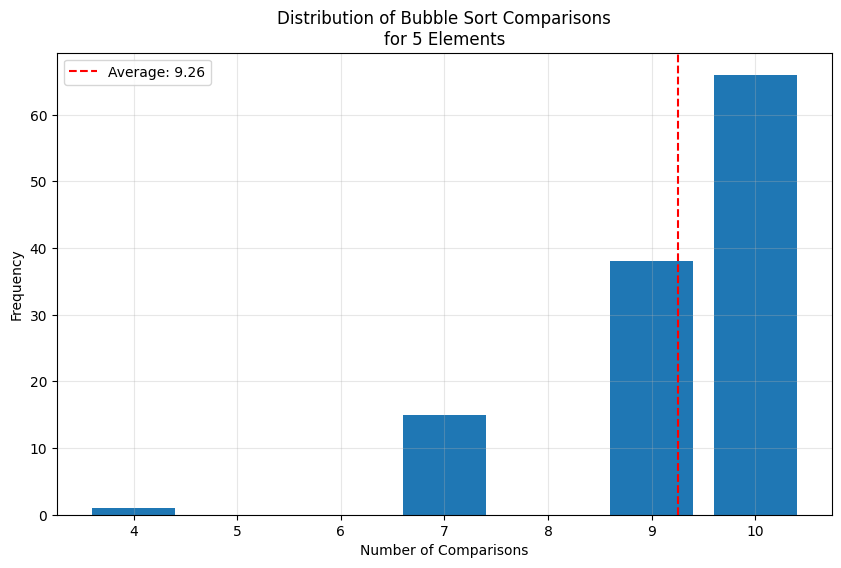

In [28]:
import matplotlib.pyplot as plt
from collections import Counter

def visualize_comparison_distribution(input_list: List[int]) -> None:
    """
    Create a histogram of comparison counts for all permutations.
    
    Args:
        input_list: The input list to analyze
    """
    # Get comparison counts for all permutations
    all_perms = list(permutations(input_list))
    comparison_counts = [bubble_sort_with_counter(list(perm))[1] for perm in all_perms]
    
    # Count frequency of each comparison count
    count_freq = Counter(comparison_counts)
    
    # Create histogram
    plt.figure(figsize=(10, 6))
    plt.bar(count_freq.keys(), count_freq.values())
    plt.title(f'Distribution of Bubble Sort Comparisons\nfor {len(input_list)} Elements')
    plt.xlabel('Number of Comparisons')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    
    # Add statistics to plot
    avg_comparisons = sum(comparison_counts) / len(comparison_counts)
    plt.axvline(avg_comparisons, color='r', linestyle='--', label=f'Average: {avg_comparisons:.2f}')
    plt.legend()
    
    plt.show()

# Create visualization
visualize_comparison_distribution(L)

## Analysis of Bubble Sort Complexity

From our empirical analysis of bubble sort on all permutations of [1, 2, 3, 4, 5], we can observe:

1. **Complexity Bounds**:
   - Best Case: O(n) comparisons - occurs when the list is already sorted
   - Worst Case: O(n²) comparisons - occurs when the list is reverse sorted
   - Average Case: O(n²) comparisons - as shown by our empirical average

2. **Key Observations**:
   - The best case occurs when elements are already in order
   - The worst case occurs when elements are in reverse order
   - Most permutations require closer to the worst-case number of comparisons
   - The optimization to break early when no swaps occur helps in near-sorted cases

3. **Distribution**:
   - The histogram shows the distribution is not uniform
   - There are more permutations requiring higher numbers of comparisons
   - This aligns with theoretical analysis of bubble sort's average case

4. **Practical Implications**:
   - Bubble sort's performance heavily depends on input ordering
   - The algorithm is most efficient on nearly-sorted data
   - For random data, expect closer to worst-case performance